
<img src="python-logo-generic.svg" alt="Python Logo">

# Introduction to Python Part II: Tools and Ecosystem

**Austin Godber**  
**@godber**
DesertPy Co-Organizer  
Meetup, Github and http://desertpy.com

<img src="Logo_DesertPy.png" alt="DesertPy Logo" style="float: right">

# DesertPy - The Phoenix Area Python Meetup Group

* Typically two meetups a month
  * 4th Wed night: Presentation meeting
  * 2nd Saturday AM: Open Hack
* Go to Meetup.com and search for DesertPy

# Python Style and Idiomatic Python

* PEP 8
  * https://www.python.org/dev/peps/pep-0008/
  * spaces, not tabs, 4 or 2, whatever you do, be consistent!
  * `pylint`, `autopep8`, `pyflakes`
* The Python Way
  * `import this`
* Idiomatic examples
  * http://python.net/~goodger/projects/pycon/2007/idiomatic/handout.html

# Interactive Environments

* Jupyter (IPython) Notebook - Interactive Web Interface
* Spyder - Desktop app, matlab like variable inspector

# Editors

* **sublimetext** - Commercial, implemented in python, using the [Anaconda Plugin](http://damnwidget.github.io/anaconda/) (different from the Anaconda python distribution)
* **atom** - with the `language-python`, `linter-pycodestyle` and `autocomplete-python` plugins
* **PyCharm** - Commercial with free version
* **vim** - Works great if you want to invest the time.

<img src="python-stack-libs.png" width=350px style="float:right;">

# 3rd Party Libs
* 3rd Party Modules - https://pypi.python.org/pypi
  * Install them with `pip`
  * These modules need to be imported
    * e.g.: `import requests`

# Python Virtual Environments

* Identify and isolate the python and 3rd party packages your code depends on.
* Use `conda` environments or `virtualenv` and `virtualenv-wrapper` or `venv` in Python 3.
* Tracking dependency versions is important over the long run (`pip freeze`/`pip install -r requirements.txt`).
* Use `pyenv` to juggle multiple Python versions and their environments.

# Testing

    Always code as if the guy who ends up
    maintaining your code will be a violent
    psychopath who knows where you live.
    
    Code for readability.

# Testing in Python

* [unittest](https://docs.python.org/3/library/unittest.html) - **STDLIB** assertion based
* [doctest](https://docs.python.org/3/library/doctest.html) - **STDLIB** example based, integrated with docstrings
* [nose](https://nose.readthedocs.org/en/latest/) - assertion based tests with framework and plugins
* [pytest](http://pytest.org/latest/) - framework that supports all of the above and more

# Basic Pytest Test

In its simplest form, a **pytest** test is a function with test in the name and will be found automatically if test is in in the filename.

In [1]:
%%writefile test_my_add.py
def my_add(a, b):
    return a + b

def test_my_add():
    assert my_add(2, 3) == 5

Overwriting test_my_add.py


## Running Pytest

In [2]:
!py.test

============================= test session starts ==============================
platform darwin -- Python 3.6.6, pytest-3.7.2, py-1.5.4, pluggy-0.7.1
rootdir: /Users/godber/Workspace/presentations/godber-python-intro-part-II, inifile:
collected 1 item                                                               

test_my_add.py .                                                         [100%]

=========================== 1 passed in 0.06 seconds ===========================


# Interactive Analysis, Presentation and Document Creation

Use the IPython Notebook, now known as the Jupyter Notebook.  Supports many languages and many uses.

This presentation was created and is running, interactively in the Jupyter Notebook.

In [3]:
print("Foo Bar!")

Foo Bar!


# Database Access

* Standard Database Drivers
  * MySQL, PostgreSQL, Mongo, Elasticsearch, etc.
* ORMs
    * **SQLAlchemy**
    * Django
    * Pewee
    * etc.
* Various db migration tools associated with above.

In [4]:
! rm sqlalchemy_example.db

## ORM - Do imports and setup base

In [5]:
from sqlalchemy import (
    Column,
    ForeignKey,
    Integer,
    String,
    create_engine)
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import relationship

Base = declarative_base()

## Declare your Model

(by subclassing `Base`)

In [6]:
class Person(Base):
    __tablename__ = 'person'
    id = Column(Integer, primary_key=True)
    name = Column(String(250), nullable=False)
    height = Column(Integer)
    addresses = relationship("Address", back_populates="person")
    
class Address(Base):
    __tablename__ = 'address'
    id = Column(Integer, primary_key=True)
    post_code = Column(String(250), nullable=False)
    person_id = Column(Integer, ForeignKey('person.id'))
    person = relationship("Person", back_populates="addresses")
    
    def __repr__(self):
        return "Address: Postal Code %s" % self.post_code
    
engine = create_engine('sqlite:///sqlalchemy_example.db')
Base.metadata.create_all(engine)

You don't really want to call `create_all` all the time ...

Modified version of:
http://pythoncentral.io/introductory-tutorial-python-sqlalchemy/

though this is the real authority:

http://docs.sqlalchemy.org/en/latest/orm/tutorial.html

Now's a good time to learn about `__repr__()` and relationships.

## Look at the resultant SQLite database

In [7]:
! sqlite3 sqlalchemy_example.db ".schema"

CREATE TABLE person (
	id INTEGER NOT NULL, 
	name VARCHAR(250) NOT NULL, 
	height INTEGER, 
	PRIMARY KEY (id)
);
CREATE TABLE address (
	id INTEGER NOT NULL, 
	post_code VARCHAR(250) NOT NULL, 
	person_id INTEGER, 
	PRIMARY KEY (id), 
	FOREIGN KEY(person_id) REFERENCES person (id)
);


## Add a Person and Address to the DB

In [8]:
from sqlalchemy.orm import sessionmaker

DBSession = sessionmaker(bind=engine)  # engine comes from above
session = DBSession()

new_person = Person(name='Austin Godber')
session.add(new_person)
session.commit()

new_address = Address(post_code='85280', person=new_person)
session.add(new_address)
session.commit()

## Check out the DB contents

In [9]:
! sqlite3 sqlalchemy_example.db \
  "SELECT * FROM person; SELECT * FROM address;"

1|Austin Godber|
1|85280|1


## Work with the Objects in the ORM

In [10]:
# keep in mind, we're using the session and engine create above
person = session.query(Person).first()
print(person)
print(person.name)
print(person.addresses[0])   # address implements __repr__()
print(person.addresses[0].post_code)

Austin Godber
Address: Postal Code 85280
85280


Lots more functionality ... queries, filters, many-to-many relationships, etc.

## Web Applications
  * **Flask**
  * Django
  * CherryPy, Pyramid, Web2py, etc
  * Lots more no doubt!

```python
from flask import Flask
app = Flask(__name__)

@app.route("/")
def hello():
    return "Hello World!"

if __name__ == "__main__":
    app.run()
```

If you were to run the code above on the command line like:

```bash
$ python ./flask_simple.py
```

You would see something like this when hitting the root URL

```bash
$ curl localhost:5000
Hello World!
```

## Onward!

This is a rabbit hole you could spend a decade on ... onward!

<img src="onward.jpg" width=600px alt="Onward!">


Image Credit: https://svpow.com/2011/02/22/onward/

# Numerical, Scientific and Visualization Applications
  * **Pandas**, **Numpy**, **Scipy**
  * Scikit-learn, Theano, TensorFlow, Scikit-image
  * Many, many domain specific tools like: AstroPy, Biopython, etc
  * Plotting - **Matplotlib**, Bokeh (dynamic/d3), seaborn, Altair, ggplot
    * [Fun Comparison Post](https://dansaber.wordpress.com/2016/10/02/a-dramatic-tour-through-pythons-data-visualization-landscape-including-ggplot-and-altair/)

## Handle the Imports

In [11]:
%matplotlib inline
import numpy as np
import scipy
import matplotlib.pylab as plt

## Generating and displaying a series

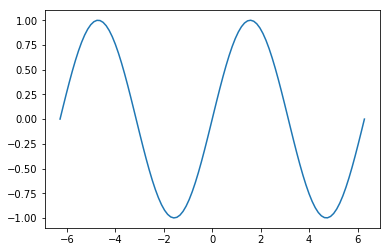

In [12]:
# Create array named `x` with values from -2*Pi to 2*Pi, 100 steps
x = np.linspace(2 * -np.pi, 2 * np.pi, 100)
plt.plot(x, np.sin(x));  # why the ;?

## Great plot, what were the numbers?

In [13]:
type(x)  # see, no trailing ;

numpy.ndarray

In [14]:
x[0:5]

array([-6.28318531, -6.15625227, -6.02931923, -5.9023862 , -5.77545316])

## And the np.sin(x)?

In [15]:
type(np.sin(x))

numpy.ndarray

In [16]:
np.sin(x)[0:5]

array([2.44929360e-16, 1.26592454e-01, 2.51147987e-01, 3.71662456e-01,
       4.86196736e-01])

## How about something fancier?

Let's make a 3D surface.  Import a few new things, setup the problem

In [17]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

n_angles = 36
n_radii = 8
radii = np.linspace(0.125, 1.0, n_radii)
angles = np.linspace(0, 2*np.pi, n_angles, endpoint=False)
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)

Create the `x`, `y`, and `z` arrays, then plot them

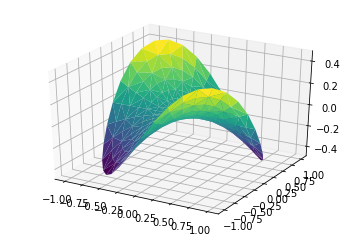

In [18]:
x = np.append(0, (radii*np.cos(angles)).flatten())
y = np.append(0, (radii*np.sin(angles)).flatten())
z = np.sin(-x*y)

fig, ax = plt.subplots(1,subplot_kw={'projection':'3d'})
ax.plot_trisurf(x, y, z, cmap=cm.viridis, linewidth=0.2)
plt.show()

# Pandas
## powerful Python data framework

In [19]:
import pandas as pd

phxtemps = pd.read_csv(
    'phx-temps.csv', index_col=0,
    names=['highs', 'lows'], parse_dates=True)
phxtemps.head()

,highs,lows
1973-01-01,53.1,37.9
1973-01-02,57.9,37.0
1973-01-03,59.0,37.0
1973-01-04,57.9,41.0
1973-01-05,54.0,39.9


## Plotting Pandas Dataframes

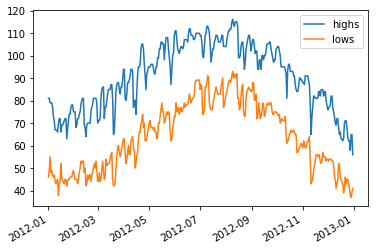

In [20]:
phxtemps['20120101':'20121231'].plot()

## Boolean Selections of Pandas DataFrames

In [21]:
phx2012 = phxtemps['2012-01-01':'2012-12-31']
phx2012[phx2012.highs > 100].highs.head()

2012-04-21    102.9
2012-04-22    105.1
2012-04-23    105.1
2012-04-24    102.9
2012-05-13    102.9
Name: highs, dtype: float64

## Plotting the selected data

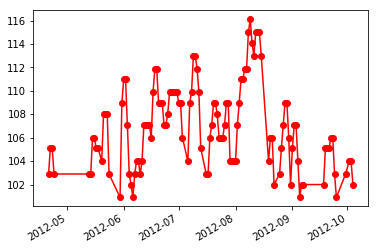

In [22]:
phx2012[phx2012.highs > 100].highs.plot(style="ro-");

# Image manipulation and Image Processing

* PIL/Pillow, Imageio, scipy
* scikit-image

## First, how does a computer represent an image?

One way is as three integer arrays (0 - 255), one each for the Red, Green and Blue Channels or bands:

<img src="wilber-channel-rgb.png" width=600px alt="Wilbur">

## Reading in an image, inspecting it

In [23]:
from scipy.misc import imread
wallaby = imread('wallaby_746_600x450.jpg')
print(type(wallaby), wallaby.size, wallaby.shape, wallaby.dtype)

/Users/godber/miniconda3/envs/desertpy-2018-v1/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/godber/miniconda3/envs/desertpy-2018-v1/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


<class 'numpy.ndarray'> 810000 (600, 450, 3) uint8


/Users/godber/miniconda3/envs/desertpy-2018-v1/lib/python3.6/site-packages/ipykernel/__main__.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  from ipykernel import kernelapp as app


## Displaying an Image

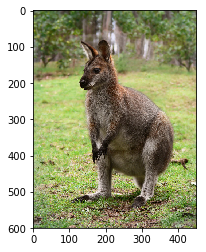

In [24]:
plt.imshow(wallaby);

## Split the image into its RGB components

Text(0.5,1,'Blue')

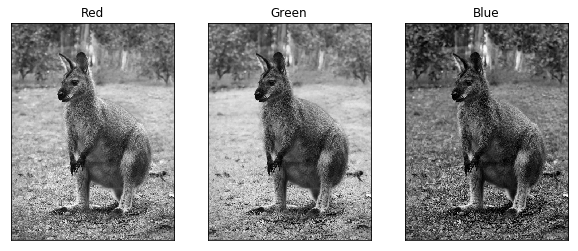

In [25]:
fig, (ax0, ax1, ax2) = plt.subplots(ncols=3)
fig.set_size_inches(10, 4)
ax0.imshow(wallaby[:, :, 0], cmap='gray')
ax0.get_yaxis().set_ticks([]); ax0.get_xaxis().set_ticks([]); ax0.set_title('Red')
ax1.imshow(wallaby[:, :, 1], cmap='gray')
ax1.get_yaxis().set_ticks([]); ax1.get_xaxis().set_ticks([]); ax1.set_title('Green')
ax2.imshow(wallaby[:, :, 2], cmap='gray')
ax2.get_yaxis().set_ticks([]); ax2.get_xaxis().set_ticks([]); ax2.set_title('Blue')

## Looking at a histogram of the pixels in one band

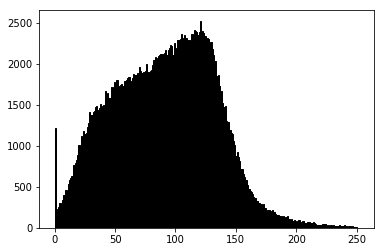

In [26]:
h = plt.hist(wallaby[:, :, 2].flatten(), 256,  fc='k', ec='k')

## Running a Sobel Filter on the Image

/Users/godber/miniconda3/envs/desertpy-2018-v1/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/godber/miniconda3/envs/desertpy-2018-v1/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility
  return f(*args, **kwds)


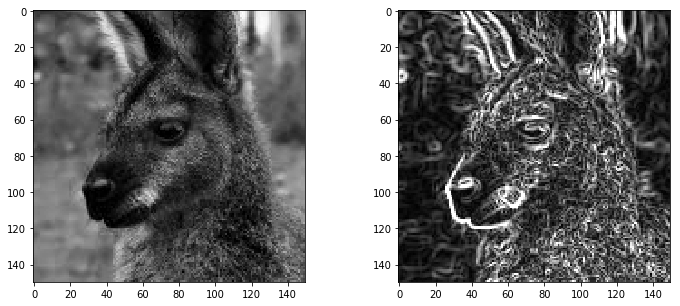

In [27]:
from skimage import filters, exposure

fig, (ax0, ax1) = plt.subplots(ncols=2)
fig.set_size_inches(12, 5)

edges = filters.sobel(wallaby[:, :, 2])
ax0.imshow(wallaby[100:250, 100:250, 2], cmap='gray');
ax1.imshow(edges[100:250, 100:250], cmap='gray', clim=(0.0,0.2));

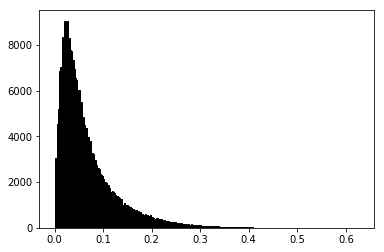

In [28]:
h = plt.hist(edges.flatten(), 256,  fc='k', ec='k')

# Python as an embedded scripting platform

* Blender
* ArcGIS
* QGIS
* Others likely

# Packages

* Learn about Python module packaging:
  * General - https://packaging.python.org/
  * Packaging a Project - https://packaging.python.org/distributing/
  * [Setuptools](https://setuptools.readthedocs.io/en/latest/setuptools.html)
* Package Types: `source` and `wheels`
* `cookiecutter` - Build packages from templates.

## Packaging Higlights

Sample: https://github.com/jkbrzt/httpie/blob/master/setup.py

* Define runtime dependencies with `install_requires`
* Use `from setuptools import setup` for advanced setup commands
* Use `console_scripts` to define command line utils
* Import your module and use docstrings directly in `setup.py`

# So Much More

There is really so much more we could talk about.

# Thank You!

**Austin Godber**  
**@godber**  
DesertPy Co-Organizer  
Meetup, Github and http://desertpy.com

* https://github.com/desertpy/presentations
* godber-intro-to-python
* godber-intro-to-python-part-II

Provide feedback by filing issue here: https://goo.gl/yR5Vct